In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Reflect Tables into SQLAlchemy ORM
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.metadata.create_all(engine)

In [6]:
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Get a list of column names and types from measurement
measure_columns = inspector.get_columns('measurement')
for c in measure_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Get a list of column names and types from station
station_columns = inspector.get_columns('station')
for c in station_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Exploratory Precipitation Analysis
#Find the total dates
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [14]:
# Find the earliest date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [15]:
# Starting from the most recent data point in the database. 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# okay we don't need the other part of the greater than because the end date is inclusive and doesnt need to be called
last_year_dates = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    group_by(Measurement.date).\
    all()

#last_year_dates

In [65]:
#last_year_dates

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(last_year_dates, columns=['date', 'prcp'])
df["date"] = pd.to_datetime(df["date"])
df.set_index('date', inplace=True)

In [18]:
df

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.00
2017-08-20,0.00
2017-08-21,0.00


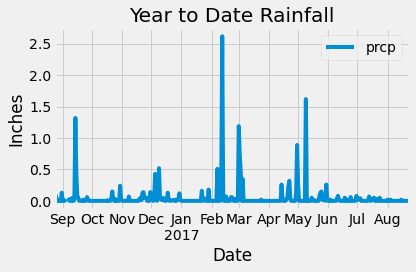

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.title("Year to Date Rainfall")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the date one year from the last date in data set.

In [ ]:
# Perform a query to retrieve the date and precipitation scores


In [36]:
# Exploratory Station Analysis
# Design a query to calculate the total number stations in the dataset
station_number = session.query(Station.id).count()
station_number

9

In [37]:
# print the result
print(f"There are a total of {station_number} stations in the dataset.")

There are a total of 9 stations in the dataset.


In [51]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).\
        all()


In [52]:
# List the stations and the counts in descending order.
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = 'USC00519281'
session.query(func.min(Measurement.tobs),
            func.max(Measurement.tobs),
            func.avg(Measurement.tobs)).\
            filter(Measurement.station == active_station).\
            all()
           

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

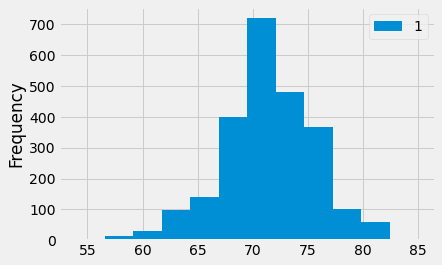

In [56]:
# Using the most active station id
most_active_station = station_activity[0][0]

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observations = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.date < "2016-08-23").\
            filter(Measurement.station == most_active_station).\
            all()

# convert to pandas
observations_df = pd.DataFrame(observations)

# plot historiogram
observations_df.plot.hist(bins=12)

In [57]:
# Close Session
session.close()